# LLM Development Workshop: An Interactive Guide to Transformers

# Introduction
Welcome to this workshop on Large Language Model (LLM) development. This notebook is designed to help data scientists, especially those with a solid ML background but less exposure to LLMs and Generative AI, understand the core concepts of transformers in an interactive and intuitive way. We will explore fundamental building blocks such as embeddings, attention, and the transformer architecture, allowing you to not only learn but also experiment.

## Agenda for this Workshop
1. Overview of Transformers
2. Understanding Embeddings
3. Exploring Self-Attention
4. Building Blocks of Transformer Architecture
5. Putting It Together: End-to-End Example

## 1. Overview of Transformers
Transformers revolutionized natural language processing by enabling models to understand contextual relationships in text, independent of sequence length. They utilize mechanisms such as **attention** to focus on relevant parts of a sequence.

We'll start by visualizing how transformer components work, including **tokenization**, **embeddings** and **attention**.

### Required Libraries

Ensure you have the following libraries installed:

Install the required libraries, Numpy for Numerical computations, matplotlib for  Data visualisation, torch for Deep learning and tensor computations, transformersfor Pre-trained models for NLP and beyond. These libraries together can form the backbone of projects involving data processing, visualization, and machine learning

In [1]:
!pip install numpy matplotlib torch transformers

The below libraries are imported and numpy will be used to work with arrays, matrices, and mathematical operations in a concise way. Matplotlib to create plots, graphs, and other visualizations using plt. Torch to work with tensors, build neural networks, and utilize GPU acceleration.Functional to offers flexibility when defining custom neural networks or directly applying operations. AutoTokenizer, AutoModel to simplifies the process of using pre-trained models for tasks like text classification, summarization, etc.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
from transformers import AutoTokenizer, AutoModel

## 2. Understanding Tokens and Embeddings

### Overview of Tokenization
**Tokenization** is the process of breaking down a sentence or text into smaller components called **tokens**. In natural language processing, these tokens can be words, subwords, or characters, depending on the tokenizer used.

In transformers, tokenization is a crucial first step because models cannot directly interpret text; they require numerical representations. Tokenizers like the one from Hugging Face's `transformers` library convert raw text into a sequence of token IDs, which correspond to vocabulary entries in the model. This sequence of token IDs is then used to create embeddings that are fed into the transformer network.

There are different types of tokenizers, such as **WordPiece**, **Byte-Pair Encoding (BPE)**, and **SentencePiece**, each with its own way of breaking down text to balance vocabulary size and representation granularity.

Tokenization ensures that meaningful parts of the text are captured and allows the transformer model to efficiently learn from them.

Word embeddings represent text in a continuous vector space, enabling numerical manipulation and similarity measures.

Let's look at how a tokenizer and embeddings are generated using Hugging Face:

AutoTokenizer processes the text into model-compatible inputs.
AutoModel processes the tokenized inputs to generate outputs like embeddings or hidden states.
The line inputs = tokenizer(text, return_tensors='pt') prepares the text to be passed into the model.

In [4]:
model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

# Input Text
text = "Transformers are wonderful, ground-breaking models."
inputs = tokenizer(text, return_tensors='pt')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Prepare Text for a BERT Model: Converts raw text into tokenized IDs and attention masks that the BERT model can process.
Ready for Model Inference: The inputs dictionary (input_ids and attention_mask) can now be passed to the BERT model for inference.

In [5]:
model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

# Input Text
text = "Transformers are wonderful, ground-breaking models."
inputs = tokenizer(text, return_tensors='pt')

Below code demonstrate how raw text is tokenized and mapped into numerical token IDs using a pre-trained tokenizer. This process is a crucial step in preparing text data for input into a transformer model like BERT, ensuring the model can process and understand the text in its numerical format.

In [6]:
print("We've mapped:", text)
print("To the following token IDs:", inputs['input_ids'])

We've mapped: Transformers are wonderful, ground-breaking models.
To the following token IDs: tensor([[  101, 19081,  2024,  6919,  1010,  2598,  1011,  4911,  4275,  1012,
           102]])


Below is to reverse the tokenization process and show how each token ID corresponds to its original token (word or subword) in the input text. This is useful for debugging and understanding how text is tokenized and processed by the model.

In [7]:
# what if we map them back?
for token_id in inputs['input_ids'][0]:
    print(f"From: {token_id} To: {tokenizer.decode(token_id)}")

From: 101 To: [CLS]
From: 19081 To: transformers
From: 2024 To: are
From: 6919 To: wonderful
From: 1010 To: ,
From: 2598 To: ground
From: 1011 To: -
From: 4911 To: breaking
From: 4275 To: models
From: 1012 To: .
From: 102 To: [SEP]


FYI: A **Torch Tensor** is a data structure that represents a multi-dimensional array, similar to numpy arrays, but with the added capability to run computations on **GPUs**. This makes it highly efficient for deep learning tasks where fast, large-scale operations are required. Tensors can be used to store numerical data and perform a variety of operations such as matrix multiplication, element-wise functions, and much more.

Unlike other number representations, Torch Tensors provide:
- **Automatic differentiation**: Tensors in PyTorch can track operations, which makes them very useful for backpropagation when training neural networks.
- **Device flexibility**: Tensors can seamlessly move between CPUs and GPUs, allowing for flexible use of computational resources.

Below code shows how to check if a CUDA-compatible GPU is available for use with PyTorch. This is important because using a GPU can significantly accelerate computations, especially for tasks like training deep learning models, where the processing power of a CPU may not be sufficient for large datasets or complex models.

In [8]:
# Show whether GPU's are available
torch.cuda.is_available()

False

Below code shows how to check how many CUDA-compatible GPUs are available on your system for use with PyTorch

In [9]:
# Show available devices
torch.cuda.device_count()

0

If we have GPU's, we can move computations between devices for efficiency
```python
# move my tokens to gpu
inputs['input_ids'] = inputs['input_ids'].to('cuda')
print(inputs)

# now move them back to cpu
inputs['input_ids'] = inputs['input_ids'].to('cpu')
print(inputs)
```

### Overview of Embeddings
Embeddings are a fundamental part of transformer models. Essentially, an **embedding** is a way of converting words (or tokens) into a fixed-length vector of numbers that captures the semantic meaning of the word. By mapping tokens into continuous vector space, embeddings allow the model to effectively understand and manipulate words as mathematical entities.

These vectors are learned during model training such that similar words in the input space have similar vector representations. For example, in a good embedding space, words like "cat" and "dog" would be closer to each other than to a word like "car" because they are semantically more related.

In transformers, embeddings serve as the first layer that converts raw token IDs into a vector form, allowing the attention mechanism and other layers to operate on meaningful numerical representations of words.

In [10]:
inputs

{'input_ids': tensor([[  101, 19081,  2024,  6919,  1010,  2598,  1011,  4911,  4275,  1012,
           102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [11]:
text

'Transformers are wonderful, ground-breaking models.'

Below code is used to extracts token embeddings from a pre-trained BERT model, demonstrating how to obtain the model's output without updating the model's weights during inference

In [12]:
# Extract embeddings
with torch.no_grad():
    outputs = model(**inputs)

# Get token embeddings
embeddings = outputs.last_hidden_state
print(f"Shape of inputs: {inputs['input_ids'].shape}")
print(f"Shape of embeddings: {embeddings.shape}")

Shape of inputs: torch.Size([1, 11])
Shape of embeddings: torch.Size([1, 11, 768])


code below returns the shape of the tensor containing the token IDs from the input text

In [13]:
inputs['input_ids'].shape

torch.Size([1, 11])

The below code is designed to explore how the tokenizer decodes a token ID back to a word and how the token embeddings (numerical representations) are structured in the BERT model

In [14]:
print("This word:", tokenizer.decode(inputs['input_ids'][0][1]))
print("Maps a token with ID:", inputs['input_ids'][0][1])
print("Which maps to an embedding of shape:", embeddings[:,1,:].shape)

print("With the following values:")
embeddings[:,0,:]

This word: transformers
Maps a token with ID: tensor(19081)
Which maps to an embedding of shape: torch.Size([1, 768])
With the following values:


tensor([[-1.1003e-01,  4.7221e-02,  8.1994e-02,  2.1200e-01, -2.3339e-01,
         -5.0149e-01, -5.0470e-02,  6.4227e-01,  9.2679e-02, -2.7205e-01,
          3.7710e-01,  2.2587e-01,  1.0833e-01,  4.9684e-01,  1.7173e-01,
          6.1047e-02, -1.3497e-01,  7.6417e-01,  4.4787e-01,  2.6572e-02,
         -3.3130e-01, -3.2338e-01,  2.6717e-01,  8.8687e-02, -1.4587e-01,
         -5.9743e-01, -1.6971e-01, -2.0841e-01, -2.2184e-01,  4.8352e-01,
         -3.8721e-01,  4.2427e-01, -5.3691e-01, -6.1065e-01,  3.7590e-01,
         -7.6415e-02,  1.9237e-01, -1.2533e-01, -1.1953e-01, -3.4416e-01,
         -2.4359e-01,  4.0304e-02,  1.2380e-01, -6.0410e-02, -4.8525e-01,
         -4.4805e-01, -3.7857e+00, -4.1603e-02, -1.9922e-01, -1.5242e-01,
          6.0483e-02, -2.1727e-01, -3.9926e-02,  5.8130e-01,  3.5395e-01,
          6.0360e-01, -3.4050e-01,  4.5302e-01,  4.1498e-02,  1.0393e-01,
          1.9620e-01,  2.7386e-01, -2.4662e-01, -1.2668e-01, -1.6268e-02,
          1.9049e-01,  2.6482e-01,  3.

### Visualization of Embeddings
To get an intuition of embeddings, we'll use **Principal Component Analysis (PCA)** to project these high-dimensional vectors onto a 2D plane.

This visualization helps us understand how semantically similar
tokens cluster together in vector space.

The below code performs Principal Component Analysis (PCA) on the token embeddings from the BERT model and visualizes the embeddings in a 2D space

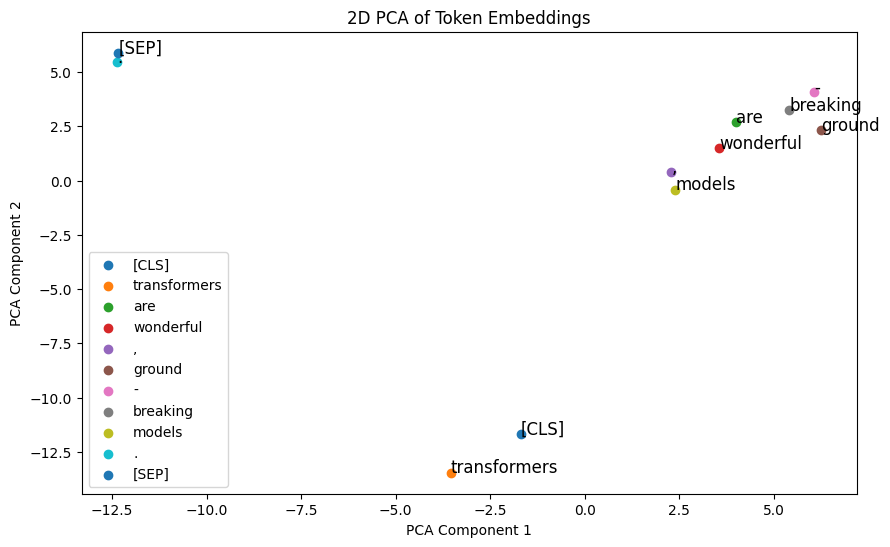

In [15]:
from sklearn.decomposition import PCA

# Converting the embeddings into numpy format
embedding_vectors = embeddings[0].numpy()
pca = PCA(n_components=2)
transformed_embeddings = pca.fit_transform(embedding_vectors)

# Plotting the embeddings
plt.figure(figsize=(10, 6))
for idx, token in enumerate(tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])):
    plt.scatter(*transformed_embeddings[idx], label=token)
    plt.text(*transformed_embeddings[idx], token, fontsize=12)

plt.title("2D PCA of Token Embeddings")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()

## 3. Exploring Self-Attention

Self-attention allows transformers to relate different words in a sentence to one another, regardless of their distance apart.

### Generating Queries, Keys, and Values:

We start by converting each word's embedding into three distinct vectors: Query (Q), Key (K), and Value (V). This helps determine which words in the input sequence should be attended to.

###  Calculating Attention Scores:

The attention score between a word and other words is determined by taking the dot product between that word's Query and the other words' Keys, followed by scaling with the dimension size.

### Softmax Normalization:

These scores are normalized using the softmax function to produce a probability distribution.
Weighted Sum of Values:

Finally, we take a weighted sum of the Value vectors, weighted by the attention probabilities.


This example shows how **queries, keys, and values** are used to calculate attention scores that determine how much focus each word should receive.

Let's implement a simple scaled dot-product attention mechanism and visualize it:

The below code demonstrates the implementation of scaled dot-product attention, which is a core component of the self-attention mechanism used in transformer models like BERT, GPT, etc.

In [16]:
def scaled_dot_product_attention(query, key, value):
    #
    d_k = query.size(-1)
    scores = torch.matmul(query, key.transpose(-2, -1)) / np.sqrt(d_k)
    attention_weights = F.softmax(scores, dim=-1)
    return torch.matmul(attention_weights, value), attention_weights

# Creating sample Q, K, V tensors
query = torch.tensor([[1.0, 0.0, 1.0], [0.0, 1.0, 0.0]]).unsqueeze(0)
key = torch.tensor([[1.0, 0.0, 1.0], [0.0, 1.0, 0.0]]).unsqueeze(0)
value = torch.tensor([[1.0, 2.0], [3.0, 4.0]]).unsqueeze(0)

# Apply scaled dot-product attention
attn_output, attn_weights = scaled_dot_product_attention(query, key, value)
print("Attention Output:", attn_output)
print("Attention Weights:", attn_weights)

Attention Output: tensor([[[1.4793, 2.4793],
         [2.2809, 3.2809]]])
Attention Weights: tensor([[[0.7604, 0.2396],
         [0.3595, 0.6405]]])


**Q, K, V Matrices:** Here, we use the same embeddings for Query, Key, and Value. In practice, these are typically linear projections of the token embeddings.

**Attention Scores:** We compute the dot product between Query and Key matrices for each token and normalize by the dimension. The resulting matrix contains similarity scores indicating how much each word should attend to others.

**Attention Weights and Output:** The scores are passed through a softmax to obtain attention weights. These weights are used to compute a weighted sum of the Value vectors, resulting in the updated representation for each token.

The below code applies scaled dot-product attention on token embeddings, treating the embeddings as the query, key, and value.

In [17]:
# Project embeddings to Q, K, V
query = embeddings
key = embeddings
value = embeddings

# Compute attention scores
scores = torch.matmul(query, key.transpose(-2, -1)) / torch.sqrt(torch.tensor(query.size(-1), dtype=torch.float32))
attention_weights = F.softmax(scores, dim=-1)

The below code prints the shapes of the input_ids and embeddings tensors.

In [18]:
# Reminder of inputs:
print("Shape of inputs:", inputs['input_ids'].shape)
print("Shape of embeddings:", embeddings.shape)

Shape of inputs: torch.Size([1, 11])
Shape of embeddings: torch.Size([1, 11, 768])


The below code you've provided prints the shape of the attention scores tensor and then looks at the attention scores of the 5th word in the input sequence.

In [19]:
# Attention scores
print("Shape of scores:", scores.shape)

# Lets see attention scores of the 5th word
scores[:, 4, :]

Shape of scores: torch.Size([1, 11, 11])


tensor([[1.2174, 0.5210, 3.7074, 3.0788, 7.1017, 2.7438, 3.7534, 3.0403, 2.5633,
         0.5779, 0.6500]])

The below code extract the attention weights for the 5th word after applying the softmax operation to the attention scores.

In [20]:
# After applying soft-max to values
# Interpretation: how much "weight" (attention) should word 5 place on each word in the sequence.
attention_weights[:, 4, :]

tensor([[0.0025, 0.0012, 0.0296, 0.0158, 0.8814, 0.0113, 0.0310, 0.0152, 0.0094,
         0.0013, 0.0014]])

The code below calculates the final attention output by applying the attention weights to the values, and then prints the shape of the resulting tensor.

In [21]:
# Lastly, Compute weighted sum of values
# In practice, these attention outputs are added to the original word embeddings.
# This process adds context from the sequence to the originally context-less embeddings.
attention_output = torch.matmul(attention_weights, value)
print("Shape of attention_output:", attention_output.shape)
attention_output[:, 4, :]

Shape of attention_output: torch.Size([1, 11, 768])


tensor([[ 1.9710e-04,  4.2568e-01,  4.9787e-01,  7.3129e-01,  6.1806e-02,
         -7.6824e-01, -5.1381e-01,  9.7528e-01,  3.4740e-02, -2.5768e-02,
          2.9173e-01,  1.8283e-01, -3.6433e-01,  1.2219e+00,  1.6976e-01,
          3.7958e-01, -3.1650e-01, -2.9530e-01, -1.1638e-01,  7.5226e-01,
         -6.4263e-01, -4.3165e-01,  2.5003e-01,  5.8580e-01,  4.2254e-01,
         -1.5221e-01, -7.0991e-01, -5.6439e-01, -2.5014e-01,  6.0583e-01,
          1.3615e-01,  4.4215e-01, -7.4432e-01, -5.4362e-01,  7.1743e-01,
          3.7489e-01, -4.4643e-02,  3.3688e-01, -4.0077e-01, -2.0608e-01,
          2.5128e-01, -5.8445e-01, -1.8640e-02,  4.7626e-01, -4.1600e-01,
         -3.8683e-01, -5.6957e-03, -1.1556e-01,  2.7603e-01, -8.9656e-01,
         -6.0208e-01, -3.2653e-01,  1.3271e-01, -6.8406e-03,  1.1258e-01,
          6.9699e-01, -8.1558e-02, -3.8823e-01, -2.2646e-01, -1.2727e-01,
         -3.7834e-01, -1.7526e-01,  6.2226e-01, -3.7799e-01, -4.9011e-02,
         -9.0143e-02, -4.0849e-01, -6.

### Visualizing Attention Weights
Let's add a simple heatmap to visualize how much focus is placed on each token.

Rows (Queries): The rows represent the queries, which essentially means the word that is "looking" at the rest of the words in the sentence to understand their relationships.

Columns (Keys): The columns represent the keys, which can be thought of as the words being "examined" by the query words.

Color Intensity: The color intensity in each cell indicates the magnitude of the attention weight between the words represented by that row (query) and column (key). The color bar on the right ranges from dark purple (low weight) to bright yellow (high weight).

The code below  creates a heatmap to visualize the attention weights between the tokens in the sequence, allowing you to better understand how each token attends to the others.

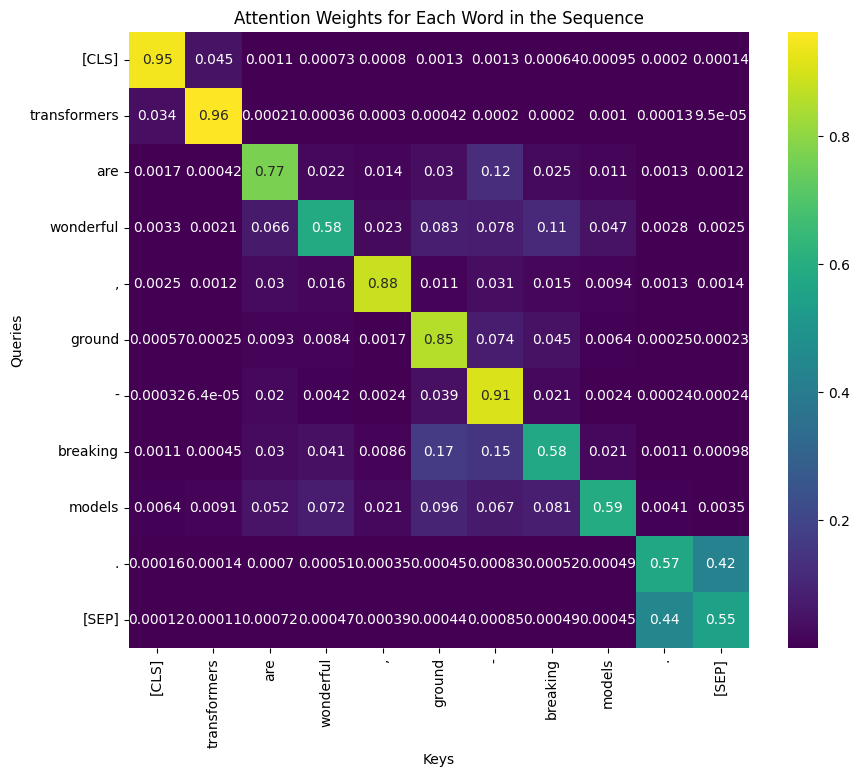

In [22]:
# Visualize attention weights
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(attention_weights[0].numpy(),
            annot=True,
            cmap="viridis",
            xticklabels=tokenizer.convert_ids_to_tokens(inputs['input_ids'][0]),
            yticklabels=tokenizer.convert_ids_to_tokens(inputs['input_ids'][0]))
plt.xlabel("Keys")
plt.ylabel("Queries")
plt.title("Attention Weights for Each Word in the Sequence")
plt.show()

### Interpreting Specific Word Attention:

- "Transformers": This word places most of its attention (0.96) on itself. This high self-attention suggests that "transformers" needs to fully understand its own representation before interacting with other words.
- "Wonderful" and "Ground-breaking": These words show more spread attention to other tokens, suggesting that their meaning relies on context within the sentence. For example, "wonderful" has non-zero attention on other tokens like "transformers" and "models," indicating its dependence on the context to derive meaning.
- "Models": The word "models" also attends to multiple tokens like "breaking," with attention values distributed moderately. This suggests that understanding "models" involves understanding some relationships with "ground-breaking" and other preceding tokens.

## 4. Transformer Building Blocks
Here, we'll demonstrate the main components of a transformer: **Multi-Head Attention**, **Feed-Forward Networks**, and **Positional Encoding**.

A basic implementation of **Positional Encoding**:

The code below defines a positional encoding function and visualizes the result using a heatmap

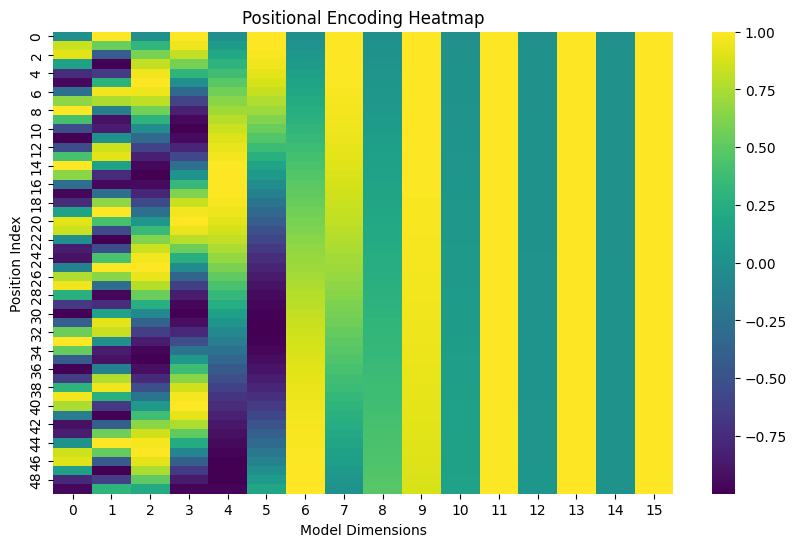

In [23]:
def positional_encoding(seq_len, d_model):
    pos = torch.arange(seq_len).unsqueeze(1)
    div_term = torch.exp(torch.arange(0, d_model, 2) * -(np.log(10000.0) / d_model))
    pe = torch.zeros(seq_len, d_model)
    pe[:, 0::2] = torch.sin(pos * div_term)
    pe[:, 1::2] = torch.cos(pos * div_term)
    return pe

# Example visualization
pos_encoding = positional_encoding(50, 16)
plt.figure(figsize=(10, 6))
sns.heatmap(pos_encoding.numpy(), cmap='viridis')
plt.title("Positional Encoding Heatmap")
plt.xlabel("Model Dimensions")
plt.ylabel("Position Index")
plt.show()

## 5. Putting It Together: End-to-End Example
Now that we understand the building blocks, let's walk through a complete transformer layer and how it processes a toy sentence step by step, including tokenization, embedding, attention, normalization, and the feed-forward layer for next token prediction

The code below tokenizes the sentence "Hello how are" using a pre-trained tokenizer (like BERT's tokenizer) and prints out the corresponding token IDs.

In [ ]:
#### Step 1: Tokenization
sentence = "Hello how are "

# Tokenize the sentence
inputs = tokenizer(sentence, return_tensors='pt')
input_ids = inputs['input_ids']
print("Token IDs:", input_ids)

Token IDs: tensor([[ 101, 7592, 2129, 2024,  102]])


The code below demonstrates how to extract the embeddings of a sequence of tokens from a pre-trained model (like BERT) and examine the shape of the resulting embeddings.

In [24]:
#### Step 2: Embedding
# Extract Embeddings
with torch.no_grad():
    outputs = model(**inputs)
embeddings = outputs.last_hidden_state
print("Embeddings Shape:", embeddings.shape)

Embeddings Shape: torch.Size([1, 11, 768])


The code below applies scaled dot-product attention to the embeddings generated from the model's output.

In [25]:
#### Step 3: Self-Attention Mechanism
# Self-Attention Calculation
query = key = value = embeddings

# Applying Scaled Dot Product Attention
attn_output, attn_weights = scaled_dot_product_attention(query, key, value)
print("Attention Output Shape:", attn_output.shape)
print("Attention Weights Shape:", attn_weights.shape)

# Look at the first 5 values of the attention outputs
attn_output[:, 1, :5]

Attention Output Shape: torch.Size([1, 11, 768])
Attention Weights Shape: torch.Size([1, 11, 11])


tensor([[ 1.5518,  0.0723, -0.1733,  0.2363,  0.4554]])

The code below demonstrates the application of Layer Normalization to the attention output obtained from the previous attention mechanism.

In [27]:
#### Step 4: Layer Normalization
# Layer normalization helps stabilize training by normalizing the inputs across the feature dimension.
from torch.nn import LayerNorm

# Apply Layer Normalization
layer_norm = LayerNorm(embeddings.size()[1:])
norm_output = layer_norm(attn_output)
print("Layer Normalized Output Shape:", norm_output.shape)

# Look at the first 5 values of the attention outputs after normalization
norm_output[:, 1, :5]

Layer Normalized Output Shape: torch.Size([1, 11, 768])


tensor([[ 3.0981,  0.1696, -0.3167,  0.4942,  0.9279]],
       grad_fn=<SliceBackward0>)

The code below demonstrates the application of a feed-forward network (FFN) to the layer-normalized output of the attention mechanism.

In [28]:
#### Step 5: Feed-Forward Network
# The feed-forward network is typically two linear layers with a ReLU activation in between.
from torch import nn

# Defining a simple feed-forward network
ffn = nn.Sequential(
    nn.Linear(norm_output.size(-1), 64),
    nn.ReLU(),
    nn.Linear(64, norm_output.size(-1))
)

# Apply Feed-Forward Network
ffn_output = ffn(norm_output)
print("Feed-Forward Network Output Shape:", ffn_output.shape)

Feed-Forward Network Output Shape: torch.Size([1, 11, 768])


This part of the code demonstrates the final output layer of a model like a transformer, where the output of the feed-forward network is passed through a linear layer to produce logits, followed by the application of softmax to convert those logits into probabilities.

In [29]:
#### Step 6: Next Token Prediction
# Finally, the output is used to predict the next token in the sequence. We use a linear layer to project back to the vocabulary size.
# Define the output layer
vocab_size = tokenizer.vocab_size
output_layer = nn.Linear(ffn_output.size(-1), vocab_size)

# Predict next token logits
logits = output_layer(ffn_output)
print("Logits Shape:", logits.shape)

# Apply softmax
probs = F.softmax(logits, dim=-1)
print("Probabilities Shape:", probs.shape)

Logits Shape: torch.Size([1, 11, 30522])
Probabilities Shape: torch.Size([1, 11, 30522])


The below code is used  to find the most likely token for each position in the sequence, based on the predicted probabilities from the softmax output.

In [30]:
probs.argmax(dim=-1)[0]

tensor([ 2450,  4050, 28704, 23589,  3782, 11685, 18473, 16992, 15384, 14843,
          152])

argmax(dim=-1) gives the token IDs of the most likely tokens for each position in the sequence.
max(dim=-1)[0] gives the corresponding maximum probabilities for each position.
decode() converts the token IDs back into human-readable text (words or subwords).

In [31]:
# Show the most likely word
print(probs.argmax(dim=-1))

# Show the probability
print(probs.max(dim=-1)[0])

# Map the tokens back to words
# Keep in mind, these values will be non-sensical since we used a randomly initialized Neural Network :)
print(tokenizer.decode(probs.argmax(dim=-1)[0]))

tensor([[ 2450,  4050, 28704, 23589,  3782, 11685, 18473, 16992, 15384, 14843,
           152]])
tensor([[5.6098e-05, 5.8611e-05, 6.4341e-05, 5.5610e-05, 4.8955e-05, 6.1683e-05,
         6.4371e-05, 5.6101e-05, 5.3094e-05, 5.1075e-05, 5.1178e-05]],
       grad_fn=<MaxBackward0>)
woman typicallylais orderly chris santo howelllining uc billed [unused147]


# LLM Fine-Tuning

There are various frameworks Machine Learning Engineers use to develop LLM's, such as PyTorch and Huggingface. For this workshop, we will use a new but popular library from `unsloth` to fine-tune LLM's in a compute and memory-efficient manor.

`Unlsoth` has several tutorial notebooks and offers free usage of a T4 GPU to jump-start your development. Let's take a look at a couple of examples:

CPT for LLMs:
- https://colab.research.google.com/drive/1-BF5HndNqQsfWRTxIt7YPjkfDpVUGNgY?usp=sharing

SFT for LLMs:
- https://colab.research.google.com/drive/15OyFkGoCImV9dSsewU1wa2JuKB4-mDE_?usp=sharing